In [1]:
import pandas as pd
from IPython.display import clear_output
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import time

In [2]:
from tqdm import tqdm, tqdm_notebook

In [3]:
from os import listdir
from os.path import isfile, join
mypath = r'F:\Documents\VU\KR\Sudoku_solver_group3\Human_solve_sudokus'
ids = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
len(ids), len(onlyfiles)

(31, 31)

In [5]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, r'F:\Documents\VU\KR\Sudoku_solver_group3')

from dpll import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
def runOnExamples(files,ids,rule_path =  r'F:\Documents\VU\KR\Sudoku_solver_group3\sudoku_rules_DIMACS.txt', 
                  write=None):
    results = []
        
    for file,_id in tqdm(zip(files,ids)):
        print(_id)
        result = testOnAllHueristics(file, rule_path, _id = _id)
        results = results+result
        if write:
            df = pd.DataFrame(result)
            df.to_csv(write, mode='a', header=False,index=False)
    return(results)

In [26]:
def testOnAllHueristics(problem_path, rule_path,
                       hueristics = ['DLCS', 'DLIS', 'JEROSLOW_WANG', 'DLIS_negated'], _id = 'example'):
    results = []
    for hueristic in tqdm(hueristics):
        start = time.time()
        solver,_,stats = run_dpll(problem_path = problem_path, 
         hueristic = hueristic, 
         rule_path =  rule_path,
         verbose= False, draw=False, show_stats=False)
        end = time.time() - start
        stats['solve_time'] = end
        stats['result'] = solver.result
        stats['id'] = _id
        stats['heuristic'] = hueristic
        results.append(stats)
        clear_output()
    return(results)

In [27]:
results = runOnExamples(onlyfiles, ids = ids, write=None)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.12s/it]
31it [03:26,  6.66s/it]


In [61]:
df = pd.DataFrame(results)

In [62]:
df['human_difficulty'] = df['id'].apply(lambda x : x.split('_')[0])

In [63]:
df['avg_human_solve_time'] = df['id'].apply(lambda x : int(x.split('_')[2].split('.')[0])*60)

In [64]:
temp = []
for i,j in zip(onlyfiles,ids):
    a = get_dimacs(example_path = i,
              rules_path=None)
    cnf = dimacs_to_cnf(a)
    for n in range(4):
        _ = {'id':j,'n_knowns':len(cnf)}
        temp.append(_)

In [68]:
df = df.merge(pd.DataFrame(temp), on='id')

In [74]:
df.to_csv('human_solved.csv', index=False)

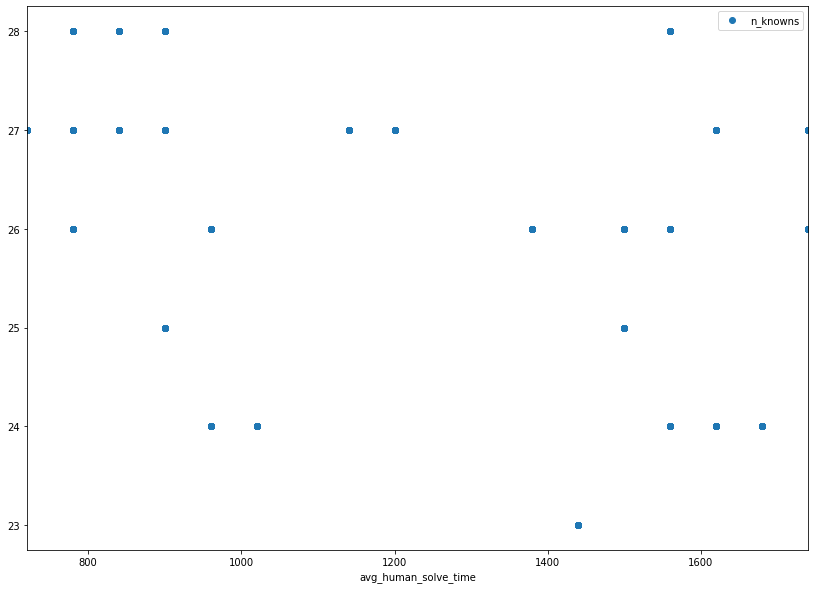

In [73]:
df.plot(y='n_knowns', x='avg_human_solve_time', style = 'o', figsize = (14,10))

In [9]:
# new_df = pd.read_csv('human_solved.csv')

In [36]:
# new_df = df.sort_values(by = 'id')

In [37]:
# new_df.to_csv('human_solved.csv', index=False)

In [38]:
# new_df.columns = columns = ['n_iterations', 'initial_n_cnf', 'initial_n_literal', 'avg_n_cnf',
#        'avg_n_literal', 'avg_n_ratio', 'mode_n_cnf', 'mode_n_literal',
#        'mode_n_ratio', 'median_n_cnf', 'median_n_literal', 'median_n_ratio',
#        'ratio_of_avgs', 'ratio_of_modes', 'ratio_of_medians', 'result', 'id',
#        'heuristic']

In [76]:
for hr in df['human_difficulty'].unique():
    _df  = df[df['human_difficulty'] == hr]
    print(hr, _df['n_knowns'].mean())

diabolical 25.333333333333332
gentle 27.5
moderate 26.46153846153846
tough 26.4


In [39]:
for hr in ['DLCS', 'DLIS', 'JEROSLOW_WANG', 'DLIS_negated']:
    _df  = new_df[new_df['heuristic'] == hr]
    print(hr, _df['n_iterations'].mean())

DLCS 23.903225806451612
DLIS 77.41935483870968
JEROSLOW_WANG 96.38709677419355
DLIS_negated 37.12903225806452


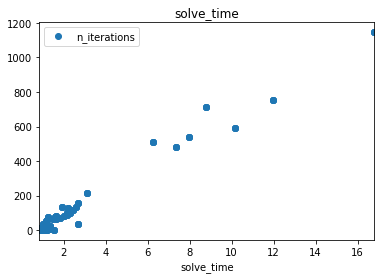

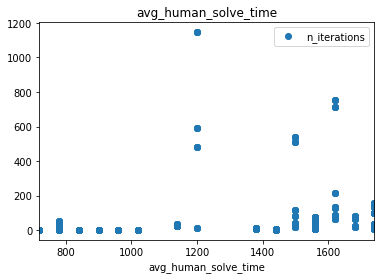

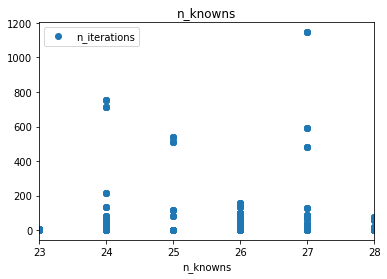

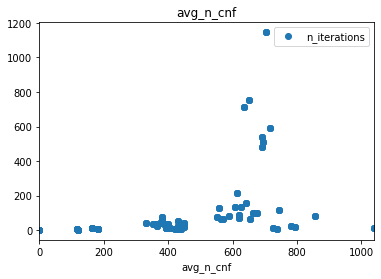

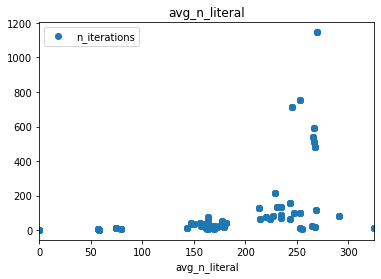

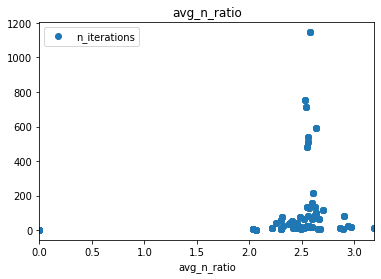

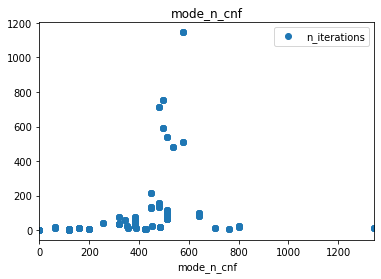

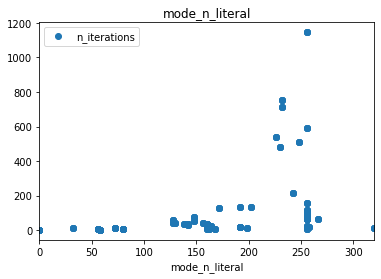

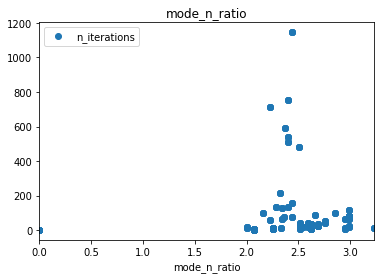

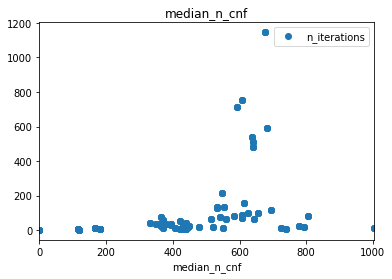

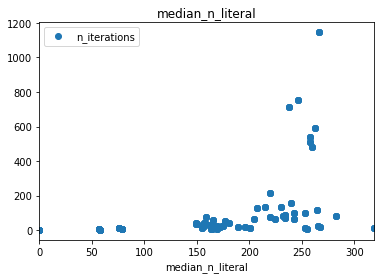

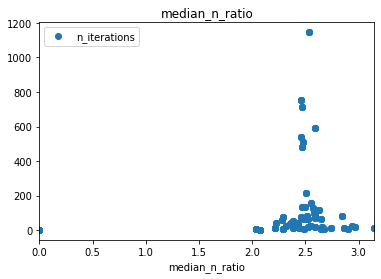

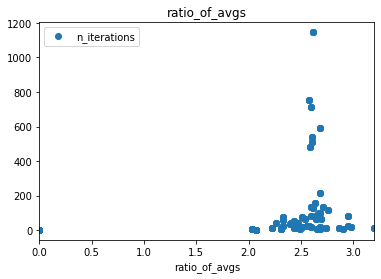

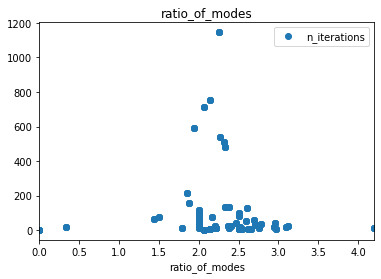

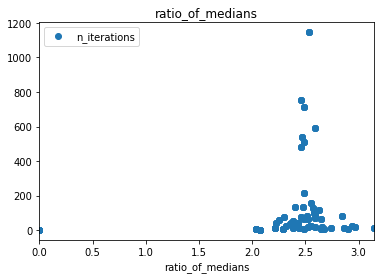

In [84]:
for col in ['solve_time', 'avg_human_solve_time', 'n_knowns' ,'avg_n_cnf',
       'avg_n_literal', 'avg_n_ratio', 'mode_n_cnf', 'mode_n_literal',
       'mode_n_ratio', 'median_n_cnf', 'median_n_literal', 'median_n_ratio',
       'ratio_of_avgs', 'ratio_of_modes', 'ratio_of_medians', ]:
    df.plot(y='n_iterations', x=col, style='o', title=col)